# 1. Выбор текста

In [30]:
with open('Пропасть и мост.txt','r') as f:
  X = f.read()
X[:1000]

'Борис Руденко\n\nПропасть и мост\n\n\n\n\n\nБорис Руденко\n\nПРОПАСТЬ И МОСТ\n\n\n\nПротяжный небесный гром услышал каждый взрослый житель Плато от Пропасти до Большой Каменной Стены. Женщины бросались к детским кроваткам, мужчины, схватив оружие, выскакивали из домов и замирали, устремив взгляды в грохотавшее небо; и только дети продолжали безмятежно спать. Их не учили бояться грома, ну что с того, что на этот раз гром звучал немного дольше? Небесный пришелец вынырнул из-за туч, прочертил в небе яркую белую линию со стороны океана, снижаясь, пронесся над Пропастью, но когда те, кто следил за его падением, внутренне напряглись в ожидании тяжкого удара, грохот, достигнув наивысшей мощи, начал плавно стихать и растворился в темноте ночи. Несколько минут тишина была абсолютной, а потом, словно оправившись от пережитого ужаса, в мир начали возвращаться привычные ночные звуки: стрекот цикад, плач шакалов и завывание свиней, как обычно, выбравшихся из Пропасти на ночную кормежку.\n\n\n\n\n\

# 2. Предобработка текста

In [32]:
X = X[70:]
X[:100]

'Протяжный небесный гром услышал каждый взрослый житель Плато от Пропасти до Большой Каменной Стены. '

In [33]:
import re

X = X.replace('\n',' ')
X = X.replace('***',' ')

# 3. Сегментация текста на предложения

In [35]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
X = nltk.tokenize.sent_tokenize(X)

X[:50]

['Протяжный небесный гром услышал каждый взрослый житель Плато от Пропасти до Большой Каменной Стены.',
 'Женщины бросались к детским кроваткам, мужчины, схватив оружие, выскакивали из домов и замирали, устремив взгляды в грохотавшее небо; и только дети продолжали безмятежно спать.',
 'Их не учили бояться грома, ну что с того, что на этот раз гром звучал немного дольше?',
 'Небесный пришелец вынырнул из-за туч, прочертил в небе яркую белую линию со стороны океана, снижаясь, пронесся над Пропастью, но когда те, кто следил за его падением, внутренне напряглись в ожидании тяжкого удара, грохот, достигнув наивысшей мощи, начал плавно стихать и растворился в темноте ночи.',
 'Несколько минут тишина была абсолютной, а потом, словно оправившись от пережитого ужаса, в мир начали возвращаться привычные ночные звуки: стрекот цикад, плач шакалов и завывание свиней, как обычно, выбравшихся из Пропасти на ночную кормежку.',
 'Лео любил это время между ночью и утром, когда ночные хищники прекращали 

# 4. Бинарная векторизация текста с лемматизацией

In [37]:
nltk.download('stopwords')
from nltk.corpus import stopwords
!python -m spacy download ru_core_news_md

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2022-11-26 18:58:11.933786: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41.9 MB 1.3 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_md')


In [40]:
import spacy
nlp = spacy.load('ru_core_news_md')
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def tokenizer(sent):
  return[token.lemma_ for token in nlp(sent) if token.is_alpha]

stop_words = stopwords.words('russian')

vectorizer = CountVectorizer(binary=True, stop_words=stop_words, tokenizer=tokenizer)

data = vectorizer.fit_transform(X)
data = pd.DataFrame(data.todense(), columns=vectorizer.get_feature_names_out())

data.info()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['весь', 'мочь', 'ничто', 'свой', 'хороший', 'это'] not in stop_words.
  % sorted(inconsistent)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Columns: 5029 entries, абсолютно to ёмкость
dtypes: int64(5029)
memory usage: 104.2 MB


In [55]:
data.head()

,абсолютно,абсолютный,авангард,авантюрах,аварийный,авария,автомат,автоматика,автоматически,автоматический,...,яростно,яростный,ярость,ярус,ясно,ясный,ячейки,ящер,ящик,ёмкость
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 5. Кластеризация токенов

In [42]:
from sklearn.cluster import FeatureAgglomeration

model = FeatureAgglomeration(n_clusters=None, distance_threshold=0.1)
model.fit(data)

max_dist = max(model.distances_)

print(max_dist)

22.10107445825802


In [43]:
import numpy as np 

dims = []
step = max_dist/50
for i in np.arange(step, max_dist, step):
  model = FeatureAgglomeration(n_clusters=None, distance_threshold=i)

  clusters = model.fit_transform(data)
  dims.append({
      'param' : round(i, 3),
      'dim' : clusters.shape[1]
      })

dims[:5]


[{'param': 0.442, 'dim': 3633},
 {'param': 0.884, 'dim': 3633},
 {'param': 1.326, 'dim': 2966},
 {'param': 1.768, 'dim': 2280},
 {'param': 2.21, 'dim': 1785}]

In [44]:
last = len(dims) - 1
dims[last]['diff'] = 0
for i, dim in enumerate(dims):
  if i == last:
    break
  dim['diff'] = dim['dim'] - dims[i+1]['dim']
dims[:5]

[{'param': 0.442, 'dim': 3633, 'diff': 0},
 {'param': 0.884, 'dim': 3633, 'diff': 667},
 {'param': 1.326, 'dim': 2966, 'diff': 686},
 {'param': 1.768, 'dim': 2280, 'diff': 495},
 {'param': 2.21, 'dim': 1785, 'diff': 470}]

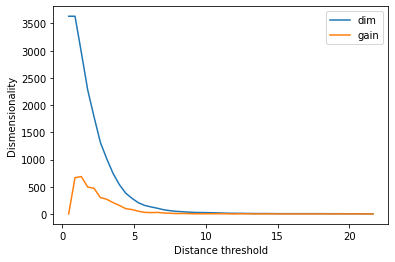

In [45]:
from matplotlib import pyplot as plt

param_list = [x['param'] for x in dims]
dim_list = [x['dim'] for x in dims]
diff_list = [x['diff'] for x in dims]

fig = plt.figure()
ax = fig.add_subplot()
ax.set_ylabel('Dismensionality')
ax.set_xlabel('Distance threshold')
plt.plot(param_list,dim_list,label='dim')
plt.plot(param_list,diff_list,label='gain')
ax.legend()
plt.show()

In [46]:
dims_sorted = sorted(dims, key=lambda x: x['diff'], reverse=True)
threshold = dims_sorted[0]['param']

model = FeatureAgglomeration(n_clusters=None,distance_threshold=threshold, pooling_func=np.min)
data_clustered = model.fit_transform(data)
data_clustered = pd.DataFrame(data_clustered)
labels = model.labels_
data_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Columns: 2966 entries, 0 to 2965
dtypes: int64(2966)
memory usage: 61.5 MB


# 6. Поиск импликаций с помощью поиска ассоциативных правил

In [47]:
from mlxtend.frequent_patterns import apriori

min_support = 2/len(data)
itemsets = apriori(data_clustered, min_support=min_support, max_len=2)

itemsets

,support,itemsets
0,0.000736,(93)
1,0.000736,(149)
2,0.002576,(213)
3,0.001472,(221)
4,0.000736,(230)
...,...,...
5432,0.000736,"(2963, 2687)"
5433,0.000736,"(2779, 2695)"
5434,0.000736,"(2723, 2755)"
5435,0.000736,"(2753, 2911)"


In [49]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(itemsets, min_threshold=min_support)
rules['antecedents'] = rules['antecedents'].apply(lambda x: list(x)[0])
rules['consequents'] = rules['consequents'].apply(lambda x: list(x)[0])

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,1587,230,0.004417,0.000736,0.000736,0.166667,226.416667,0.000733,1.199117
1,230,1587,0.000736,0.004417,0.000736,1.000000,226.416667,0.000733,inf
2,2282,230,0.001472,0.000736,0.000736,0.500000,679.250000,0.000735,1.998528
3,230,2282,0.000736,0.001472,0.000736,1.000000,679.250000,0.000735,inf
4,264,1737,0.001104,0.012514,0.000736,0.666667,53.274510,0.000722,2.962459
...,...,...,...,...,...,...,...,...,...
7629,2755,2723,0.002576,0.001840,0.000736,0.285714,155.257143,0.000731,1.397424
7630,2753,2911,0.013250,0.002944,0.000736,0.055556,18.868056,0.000697,1.055706
7631,2911,2753,0.002944,0.013250,0.000736,0.250000,18.868056,0.000697,1.315667
7632,2945,2938,0.012514,0.000736,0.000736,0.058824,79.911765,0.000727,1.061718


In [50]:
incls = rules[rules['confidence'] == 1]
incls = incls[['antecedents','consequents']]

incls

,antecedents,consequents
1,230,1587
3,230,2282
11,277,837
13,277,2529
339,1895,446
...,...,...
7482,2545,2502
7504,2536,2643
7512,2556,2743
7577,2725,2632


# 7. Формирование онтологии

In [51]:
!pip install Cython
!pip install owlready2
from owlready2 import *
import types

onto = get_ontology('http://onto.owl')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.5 MB 50.3 MB/s 
  Created wheel for owlready2: filename=Owlready2-0.39-cp37-cp37m-linux_x86_64.whl size=22132067 sha256=528771caeb29b03026c3a23613ddaac1daa73b71f5ca88e3ffb3668bd9962d23
  Stored in directory: /root/.cache/pip/wheels/c9/5b/fc/da1e42a17f22cd62bfb170f847a3fb541a7f628858ad3595ec
Successfully built owlready2


In [52]:
with onto:
  onto_sent = types.new_class('Sentence', (Thing,))
  types.new_class('hasText', (DataProperty, FunctionalProperty))
  for i, sent in enumerate(X):
    sent_inst = onto_sent(f'sentence_{i}')
    sent_inst.hasText = sent

onto.save('onto.owl')

In [53]:
with onto:
  onto_token = types.new_class('Token', (Thing,))
  for i, token in enumerate(data.columns):
    token_inst = onto_token(f'token_{i}')
    token_inst.label = token

onto.save('onto.owl')

In [56]:
with onto:
  hasToken = types.new_class('hasToken', (ObjectProperty,))
  for i, row in data.iterrows():
    sent_inst = onto[f'sentence_{i}']
    for j, token in enumerate(data.columns):
      if row[token] == 1:
        token_inst = onto[f'token_{j}']
        sent_inst.hasToken.append(token_inst)

onto.save('onto.owl')

# 8. Кластеризация предложений с помощью ризонера

In [57]:
with onto:
  onto_clust = types.new_class('Cluster', (Thing,))
  for label in set(labels):
    clust_cl = types.new_class(f'Cluster_{label}', (onto_clust,))

onto.save('onto.owl')

In [60]:
with onto:
  for i, label in enumerate(labels):
    clust_cl = onto[f'Cluster_{label}']
    token_inst = onto[f'token_{i}']
    clust_cl.equivalent_to.append(hasToken.value(token_inst))

onto.save('onto.owl')

In [61]:
with onto:
  for index, row in incls.iterrows():
    ant = row['antecedents']
    con = row['consequents']
    ant_cl = onto[f'Cluster_{ant}']
    con_cl = onto[f'Cluster_{con}']
    reverse = incls[(incls['antecedents'] == con) & (incls['consequents'] == ant)]
    if reverse.empty:
      ant_cl.is_a.append(con_cl)
    else:
      ant_cl.equivalent_to.append(con_cl)

onto.save('onto.owl')

In [62]:
with onto:
  sync_reasoner_pellet()

onto.save('onto_reasoned.owl',format='ntriples')

* Owlready2 * Running Pellet...
    java -Xmx2000M -cp /usr/local/lib/python3.7/dist-packages/owlready2/pellet/slf4j-api-1.6.4.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/jena-tdb-0.10.0.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/jena-arq-2.10.0.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/antlr-runtime-3.2.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/xercesImpl-2.10.0.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/slf4j-log4j12-1.6.4.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/log4j-1.2.16.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/antlr-3.2.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/jgrapht-jdk1.5.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/httpcore-4.2.2.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/xml-apis-1.4.01.jar:/usr/local/lib/python3.7/dist-packages/owlready2/pellet/jcl-over-slf4j-1.6.4.jar:/usr/local/lib/python3.7/dist-p